# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

To answer the questions, you will use that data, the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). You will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).


# Konstantinos Eleftheriou, p3200283<br>

<hr>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

!pip install xlrd

We have downloaded all necessary data, and placed them in a folder called `data`.<br> We can go ahead and read them.

In [2]:
# Path to where our data is located.
PATH_DATA = 'data/'

polity_df = pd.read_excel(PATH_DATA + 'p5v2018.xls')

navco_df = pd.read_excel(PATH_DATA + 'navco_data.xlsx')

Polity dataframe includes information for each country, one of the columns that we ought to investigate is the:
* `polity` column, provides an indication of where that country falls on a spectrum between democracy and autocracy.<br> A higher positive score suggests a more democratic system, while a lower or negative score suggests a more autocratic system.

In [3]:
polity_df[['p5', 'year', 'country', 'polity']].sample(5)

,p5,year,country,polity
3556,1,1900,Costa Rica,8
11108,0,1849,Netherlands,-3
1300,1,1945,Belgium,8
17489,0,1973,Zambia,-9
4959,0,1965,Ethiopia,-9


In [4]:
polity_df.columns

Index(['p5', 'cyear', 'ccode', 'scode', 'country', 'year', 'flag', 'fragment',
       'democ', 'autoc', 'polity', 'polity2', 'durable', 'xrreg', 'xrcomp',
       'xropen', 'xconst', 'parreg', 'parcomp', 'exrec', 'exconst', 'polcomp',
       'prior', 'emonth', 'eday', 'eyear', 'eprec', 'interim', 'bmonth',
       'bday', 'byear', 'bprec', 'post', 'change', 'd5', 'sf', 'regtrans'],
      dtype='object')

Navco data is the main dataset that we are going to utilize for the majority of this analysis.

This is how the Navco data looks like.

* For each campaign, we have relevant information about what was the campaign's location, target, and several useful binary variables ,such as `SUCCEED` which identifies whether the campaign succeeded or not.
* Futhermore, according to the CodeBook provided with this data, while `BYEAR` corresponds to the year in which the campaign started,`EYEAR` is interpreted as the year which the campaign reaches it's peak.

In [5]:
navco_df[['CAMPAIGN', 'LOCATION', 'TARGET', 'BYEAR', 'SUCCESS']].sample(5)

,CAMPAIGN,LOCATION,TARGET,BYEAR,SUCCESS
150,Indonesian Revolt,Indonesia,Dutch occupation,1945,1
251,Mohajir,Pakistan,Pakistani government,1994,0
243,Popular Front for the Liberation of Oman and t...,Oman,Oman government,1962,0
368,NDF,Yemen,Government of Yemen,1979,0
312,Anya Nya,Sudan,Sudanese government,1963,0


We will also rename this column just to keep our column names clean, readable and follow basic coding standards.

In [6]:
navco_df.rename(columns={'PERCENTAGE POPULAR PARTICIPATION': 'PERCENTAGE_POPULAR_PARTICIPATION'}, inplace=True)

## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

Your plot should look like the following:

<img src="fig_1.svg"/>

We can start by deep copying our dataframe ensuring that our modifications do not affect the original dataset.
* Τhen we will be selecting a subset of our columns that are going to be utilized for the following queries.<br> This is only done inorder to work with a more 'simplified' dataframe (that is a dataframe with less columns).

In [7]:
sub_data = (navco_df[['CAMPAIGN', 'BYEAR', 'EYEAR', 'NONVIOL', 'VIOL', 'SUCCESS']]).copy()

sub_data.head()

,CAMPAIGN,BYEAR,EYEAR,NONVIOL,VIOL,SUCCESS
0,Afghans,1978,1979,0,1,1
1,Afghan resistance,1980,1989,0,1,1
2,Taliban/anti-government forces,1992,1996,0,1,1
3,Taliban,2001,2014,0,1,0
4,Albanian anti-communist,1990,1991,1,0,1


Just because we want information per decade, we can extract on what decade each year corresponds to, based on the `EYEAR`.<br>
Lastly, we can drop `EYEAR` to keep our dataframe clean.

In [8]:
# Calculating the matching decade for each year.
sub_data['DECADE'] = (sub_data['EYEAR'] // 10) * 10

sub_data.drop(columns=['EYEAR'], inplace=True)

sub_data.head()

,CAMPAIGN,BYEAR,NONVIOL,VIOL,SUCCESS,DECADE
0,Afghans,1978,0,1,1,1970
1,Afghan resistance,1980,0,1,1,1980
2,Taliban/anti-government forces,1992,0,1,1,1990
3,Taliban,2001,0,1,0,2010
4,Albanian anti-communist,1990,1,0,1,1990


We can now start by grouping by each campaign by it's decade, that is the decade that this campaign took place. 
* After that, we will compute the total number of non-violent and violent campaigns, and sort them chronically.

In [9]:
# Summing up both categories, and sorting.
grouped_data = sub_data.groupby('DECADE').sum(['NONVIOL', 'VIOL']).sort_values(by='DECADE') \
                                                                            .reset_index()

grouped_data.head()

,DECADE,BYEAR,NONVIOL,VIOL,SUCCESS
0,1940,27250,2,12,7
1,1950,66360,9,25,10
2,1960,56868,8,21,6
3,1970,78832,13,27,19
4,1980,93138,30,17,19


Now that we have all our data ready for plotting, we should start by extracting firstly the data needed for that.<br> And that is, the decade, non-violent and violent campaigns.


In [10]:
x_decades = grouped_data['DECADE']

y_non_viol = grouped_data['NONVIOL']
y_viol = grouped_data['VIOL']

We can now move to plotting.
* The plot reveals that, in general, there are more non-violent campaigns than violent ones.

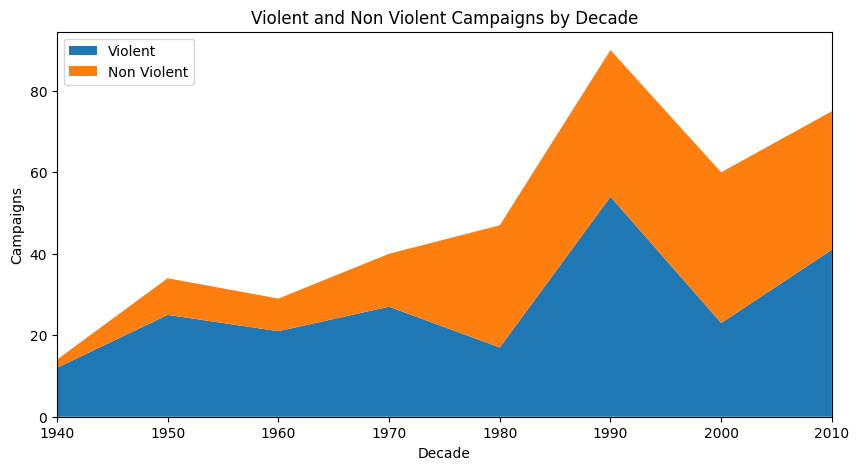

In [11]:
# Making x and y axis of our figure bigger
plt.figure(figsize=(10, 5))

# Plotting our stackplot
plt.stackplot(x_decades, y_viol, y_non_viol, labels=['Violent', 'Non Violent'])
plt.title('Violent and Non Violent Campaigns by Decade')
plt.xlabel('Decade')
plt.ylabel('Campaigns')

# Necessary for removing white spaces on the x axis
plt.margins(x=0)

plt.legend(loc='upper left')

plt.show()

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

<img src="fig_2.svg"/>

Moving to our second task, observe that our dataset doesn't provide any information when it comes to the number of successful violent campaigns or non-violent.
* It would be wise, thus, to start by computing this for both non-violent and violent campaigns.

In [12]:
print(navco_df.columns)

navco_df.head()

Index(['NAVCO ID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGE_POPULAR_PARTICIPATION', 'REGVIOL',
       'DEFECT', 'VIOLENT FLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype='object')


,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE_POPULAR_PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,0,613,10000.0,0.000641,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,0,3281,10000.0,0.000685,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,0,1370,20000.0,0.000893,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,0,4391,60000.0,0.001625,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,0,442,300000.0,0.091068,1,0,0.0,1.0,1,0


Again, to make our dataframe easier to read and work with, a subset of our total columns will be selected.

In [13]:
sub_data.head()

,CAMPAIGN,BYEAR,NONVIOL,VIOL,SUCCESS,DECADE
0,Afghans,1978,0,1,1,1970
1,Afghan resistance,1980,0,1,1,1980
2,Taliban/anti-government forces,1992,0,1,1,1990
3,Taliban,2001,0,1,0,2010
4,Albanian anti-communist,1990,1,0,1,1990


And to avoid modifying our original dataset, we can create a copy of this dataframe.

In [14]:
subset_copy = sub_data.copy()

After that, we can easily create a new column indicating for each campaign, the outcome (success or not).
* We will leverage numpy's `where` function which returns rows based on a given condition, if the condition holds, then `subset_copy['SUCCESS']` will be inserted to this new column, else 0.
* What we are trying to achieve here is basically keeping track, for every campaign hosted, if that specific campaign was succesful based on what type of event it was (violent or not).

In [15]:
# Maps our current column
# to each new SUCCESS column that is
# responsible for storing the number of successful campaigns per type.
column_mapping = {
    'NONVIOL': 'SUCCESS_NONVIOL',
    'VIOL': 'SUCCESS_VIOL'
}

# Creating our new column
for source_column, new_column in column_mapping.items():
    subset_copy[new_column] = np.where(subset_copy[source_column] > 0, subset_copy['SUCCESS'], 0)


subset_copy.head()

,CAMPAIGN,BYEAR,NONVIOL,VIOL,SUCCESS,DECADE,SUCCESS_NONVIOL,SUCCESS_VIOL
0,Afghans,1978,0,1,1,1970,0,1
1,Afghan resistance,1980,0,1,1,1980,0,1
2,Taliban/anti-government forces,1992,0,1,1,1990,0,1
3,Taliban,2001,0,1,0,2010,0,0
4,Albanian anti-communist,1990,1,0,1,1990,1,0


We follow this computation, by, again, grouping by decade and taking the sum of each column we are interested in looking.

In [16]:
camp_grouped = subset_copy.groupby('DECADE').sum(['NONVIOL', 'VIOL', 'SUCCESS']).sort_values(by='DECADE') \
                                                                                        .reset_index()
camp_grouped.head()

,DECADE,BYEAR,NONVIOL,VIOL,SUCCESS,SUCCESS_NONVIOL,SUCCESS_VIOL
0,1940,27250,2,12,7,1,6
1,1950,66360,9,25,10,2,8
2,1960,56868,8,21,6,2,4
3,1970,78832,13,27,19,7,12
4,1980,93138,30,17,19,14,5


However, we still need to calculate the percentages.

* For each type of campaign outcome, whether it's a violation or non-violation, we calculate the percentage of successful events within each category.

* This involves creating new columns in our copied dataset to store these calculated percentages. <br> Each new column will now represent the success rate for a specific campaign outcome, whether it's a successful non-violation (`SUCCESS_NONVIOL`) or successful violation (`SUCCESS_VIOL`).

In [17]:
camp_grouped_copy = camp_grouped[['DECADE', 'NONVIOL', 'VIOL', 'SUCCESS_NONVIOL', 'SUCCESS_VIOL']].copy()

column_mapping = {
    'NONVIOL': 'SUCCESS_NONVIOL',
    'VIOL': 'SUCCESS_VIOL'
}

# Creating our new percentage columns, which is SUCCESS_*_PERC, where * is both NONVIOL and VIOL
for source_column, new_column in column_mapping.items():    

    perc_column = new_column + '_PERC'
    camp_grouped_copy[perc_column] = camp_grouped_copy[new_column] / camp_grouped_copy[source_column]

camp_grouped_copy.head()

,DECADE,NONVIOL,VIOL,SUCCESS_NONVIOL,SUCCESS_VIOL,SUCCESS_NONVIOL_PERC,SUCCESS_VIOL_PERC
0,1940,2,12,1,6,0.500000,0.500000
1,1950,9,25,2,8,0.222222,0.320000
2,1960,8,21,2,4,0.250000,0.190476
3,1970,13,27,7,12,0.538462,0.444444
4,1980,30,17,14,5,0.466667,0.294118


Finally, we can now plot our results. <br>

* Matplotlib makes it really easy for us to create this 'side-by-side' barplot with multiple axes.

* By examining this side-by-side bar plot, we can gain insights into by not only how much do campaigns happen per decade, but also how the success of non-violent campaigns has evolved over these decades.

* Clearly, the number of campaigns is increasing as the decade's go, whereas the success rate of specific, non-violent campaigns varies every decade.

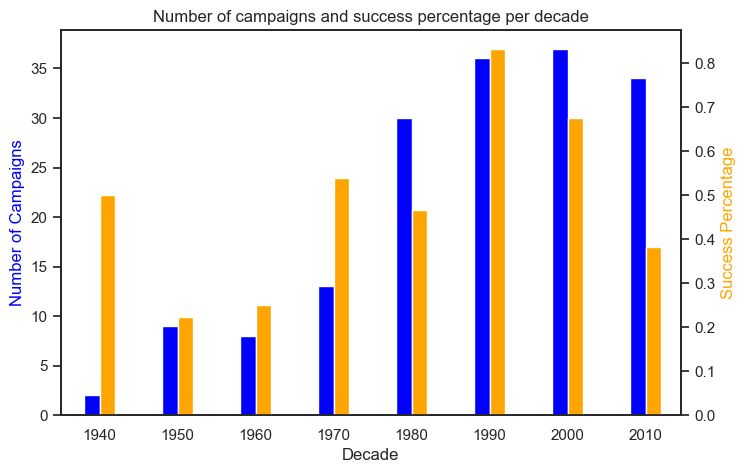

In [18]:
sns.set_theme(style='white', palette=None)


plt.figure(figsize=(8, 5))

plt.title('Number of campaigns and success percentage per decade')

bar_width = 0.2

# Creating the first y-axis
ax1 = camp_grouped_copy['NONVIOL'].plot(kind='bar', color='blue', position=1, width=bar_width)

# Creating the second y-axis
ax2 = ax1.twinx()
camp_grouped_copy['SUCCESS_NONVIOL_PERC'].plot(kind='bar', color='orange', position=0, width=bar_width, ax=ax2)

ax1.set_ylabel('Number of Campaigns', color='blue')
ax2.set_ylabel('Success Percentage', color='orange')

ax1.set_xticklabels(camp_grouped_copy['DECADE'], rotation=0)
ax1.set_xlabel('Decade')

# Adding padding to the left side of the bars
plt.xlim(left=-0.5)

plt.show()

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like the following, showing that nonviolent campaigns have higher success probabilities:

<img src="fig_3.svg" />

Notice that our data is ready to be visualised as, the procedure of calculating the percentage's for both types of campaigns (non-violent or violent) has already been done.

In [19]:
camp_grouped_copy.head()

,DECADE,NONVIOL,VIOL,SUCCESS_NONVIOL,SUCCESS_VIOL,SUCCESS_NONVIOL_PERC,SUCCESS_VIOL_PERC
0,1940,2,12,1,6,0.500000,0.500000
1,1950,9,25,2,8,0.222222,0.320000
2,1960,8,21,2,4,0.250000,0.190476
3,1970,13,27,7,12,0.538462,0.444444
4,1980,30,17,14,5,0.466667,0.294118


Proceeding now to our plot, the procedure is pretty similar, however in this situation we are dealing with only 1 axes.
* Now, when considering the distribution of `Non-Violent` and `Violent` campaigns per decade, it's clear that the chances of a campaign being considered successful—meaning that the rights people are protesting for are more likely to be accepted—are higher when the campaign 'follows' nonviolent methods. 

* However, in the 1950s, a notable differentiation is observed with a greater success percentage for violent campaigns. <br>This could be due to the post-World War II event during that decate, where in certain instances, violent approaches were perceived for achieving political objectives.

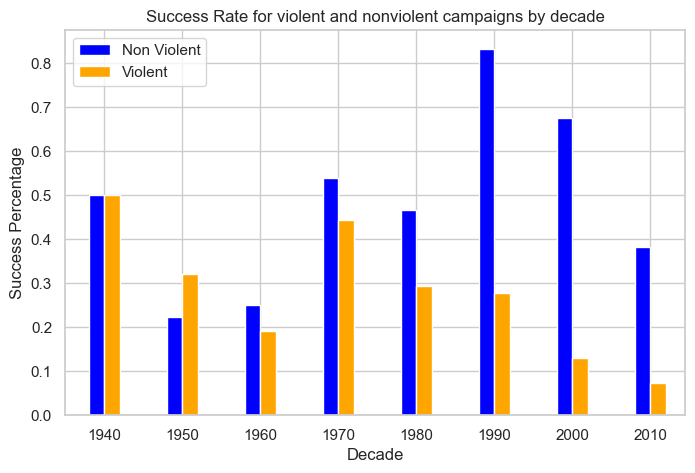

In [20]:
sns.set_theme(style='whitegrid', palette=None)

plt.figure(figsize=(8, 5))

plt.title('Success Rate for violent and nonviolent campaigns by decade')

bar_width = 0.2

# Creating the first barplot for the nonviol perc.
ax1 = camp_grouped_copy['SUCCESS_NONVIOL_PERC'].plot(kind='bar', color='blue', position=1, width=bar_width, \
                                                                                          label='Non Violent')

# Creating the second barplot for the viol perc.
ax2 = camp_grouped_copy['SUCCESS_VIOL_PERC'].plot(kind='bar', color='orange', position=0, width=bar_width, \
                                                                                          label='Violent')

# Adjusting the rotation of the decades axis
ax1.set_xticklabels(camp_grouped_copy['DECADE'], rotation=0)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Success Percentage')

plt.legend(loc='upper left')

# Adingd padding to the left side of the bars
plt.xlim(left=-0.5)

plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. The plot should look like the one below.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

<img src='participation_2pct.svg'>

Starting of, let's first start by finding out which campaign's had a participation percentange of at least 2.0%.
* We will also sort the values, so that they are plotted with non-ascending order, meaning from the campaign with the largest percentage of population to the lowest.

In [21]:
# The 2% threshold we want to filter by
perc_participation_threshold = 0.020

# Filtering those campaigns that have a percentage participation greater than 2%.
filtered_campaigns = navco_df[navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] > perc_participation_threshold].copy() \
                            .sort_values(by='PERCENTAGE_POPULAR_PARTICIPATION', ascending=False)

# Small modification, basically creates a new name for each campaign combining the location of the
# campaign, with the target. 
# Will be used for plotting purposes to have a better idea of what each campaign purpose was.
filtered_campaigns['MODIFIED_NAME'] = filtered_campaigns['LOCATION'] + ': ' + filtered_campaigns['TARGET']

filtered_campaigns[['CAMPAIGN', 'LOCATION', 'SUCCESS', 'FAILURE', 'MODIFIED_NAME', 'PERCENTAGE_POPULAR_PARTICIPATION']].sample(5)

,CAMPAIGN,LOCATION,SUCCESS,FAILURE,MODIFIED_NAME,PERCENTAGE_POPULAR_PARTICIPATION
115,Rose Revolution,Georgia,1,0,Georgia: Shevardnadze regime,0.046501
339,Pro-Democracy Protests,Tonga,0,0,Tonga: Government,0.029502
292,anti-Milosevic,Serbia,1,0,Serbia: Milosevic regime,0.026609
201,pro-democracy movement/Sajudis,Lithuania,1,0,Lithuania: Lithuanian regime,0.067492
34,Brunei Revolt,Brunei,0,1,Brunei: Brunei government,0.044641


Let's now start working on our plot.
* The level's of success for each campaign are categorized as `Success`, `Failure` or `Limited`.
* According to our CodeBook, `Limited` refers to as a <br>
*"Binary variable identifying whether the campaign achieved some of its stated goals within a year of the peak of activities."*
<br><br>
* Obviously, each campaign can have one and only one category or level of success.<br>
Thankfully, seaborn makes it easy for us to visualize the category of each campaign , by using the `hue` attribute.
<hr>

* Before that, however, a few preparation steps are needed.
* Firstly a new column named `Outcome` is introduced. The values in this column are determined by considering our 3 categorical factors. Initially, the column is populated based on the `FAILURE` column, where binary values (0 for success, 1 for failure) are mapped to their corresponding categories.<br> Same procedure is followed for both `SUCCESS` and `LIMITED` categories.

* Each entry now, is categorized based on these three types of success levels.

In [22]:
# Creating the first column.
filtered_campaigns['OUTCOME'] = ''

# Assigning for every campaign (row), a specific label based on it's category

filtered_campaigns.loc[filtered_campaigns['FAILURE'] == 1, 'OUTCOME'] = 'Campaign failed'

filtered_campaigns.loc[filtered_campaigns['SUCCESS'] == 1, 'OUTCOME'] = 'Campaign succeeded'

filtered_campaigns.loc[filtered_campaigns['LIMITED'] == 1, 'OUTCOME'] = 'Campaign achieved some of its stated goals'

filtered_campaigns['OUTCOME'].unique()

array(['Campaign succeeded', 'Campaign failed',
       'Campaign achieved some of its stated goals'], dtype=object)

Now that our data is ready, the procedure of plotting a barplot is easy.
* However, we still need to annotate—or display—the population participation percentage inside the bars.
* This can be accomplished by using the `text` method, a function that facilitates the embedding of text labels, with inputs specifying the content to be annotated along with the x and y coordinates within each patch.

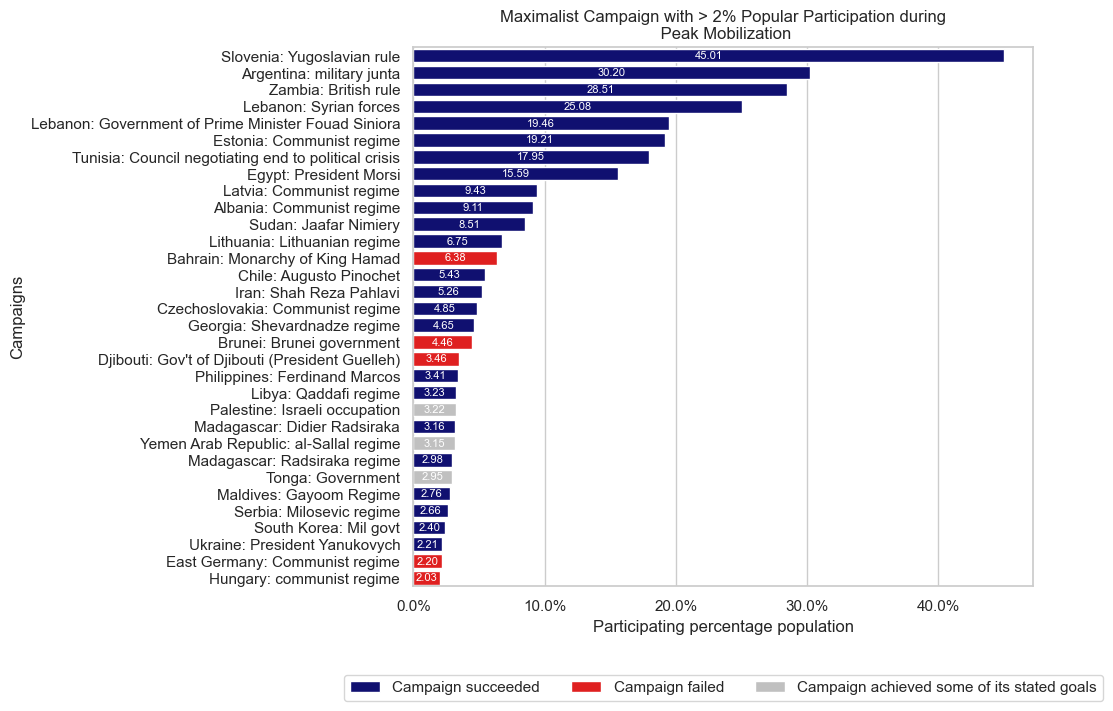

In [23]:
from matplotlib.ticker import FuncFormatter

def percentage_formatter(x, pos=0):
    return f'{x * 100:.1f}%'

# Specifying a custom palette to be used.
custom_palette = {
                  'Campaign succeeded': 'navy', 
                  'Campaign failed': 'red', 
                  'Campaign achieved some of its stated goals': 'silver'
                  }
                                                                                                  
plt.figure(figsize=(8, 7))

plt.title('Maximalist Campaign with > 2% Popular Participation during\n Peak Mobilization')

ax = sns.barplot(x='PERCENTAGE_POPULAR_PARTICIPATION', y='MODIFIED_NAME', data=filtered_campaigns, hue='OUTCOME',\
                                                                                         palette=custom_palette)

plt.ylabel('Campaigns')
plt.xlabel('Participating percentage population')

# Formatting the x axis with our custom percentage_formatter function
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Looping through all our shapes (bars).
for index, bar in enumerate(ax.patches):
    
    # Condition that eliminates 'ghost' bars.
    # If these lines are removed, .text will be executed
    # and display non-existent values of 0.
    if (bar.get_width() == 0):
        continue
        
    # Displaying for each bar the percentage, in a centered position.
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width() * 100:.2f}', ha='center', va='center', color='white', fontsize=8)

# Placινγ legend below the plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(filtered_campaigns['OUTCOME'].unique()))

plt.show()


Let us now investigate if there are any information regarding to Greece campaigns.<br>
* We notice that, none of Greece's campaigns appear to be considered as a maximalist campaign with over 2% of participation during peak mobilization.

In [24]:
filtered_campaigns['LOCATION'].str == 'Greece'

False

Moving back to our original dataset, we can distinguish 2 campaigns that are chronologically different, but both happen to be upon big, historical event's for Greece.<br>

In [25]:
# Filtering campaigns that where located in Greece.
greek_campaigns = navco_df[navco_df['LOCATION'] == 'Greece']

greek_campaigns[['LOCATION', 'TARGET', 'BYEAR', 'SUCCESS', 'FAILURE', 'PARTICIPATION', 'PERCENTAGE_POPULAR_PARTICIPATION']].head()

,LOCATION,TARGET,BYEAR,SUCCESS,FAILURE,PARTICIPATION,PERCENTAGE_POPULAR_PARTICIPATION
119,Greece,British and US occupation,1946,0,1,40000.0,0.005092
120,Greece,Military rule,1973,1,0,2500.0,0.000279


Let's take a closer look at the details of these 2 campaigns.

* The **Greek Civil War** campaign, was characterized by a `Violent` status with a duration over 1750 days, 40,000 peak participants, and a 5% popularity participation. A campaign that eventually failed. <br>
This tell us that while the campaign may attracted some attention, this `Violent` approach and the relatively low percentage of popular participation might have played a big role in its lack of success.
<br><br>
* On the other hand, examining the **Greek Anti-Military Polytechnic** campaign reveals a different view. With a shorter duration of ~650 days, less than 5000 peak participants, and a `Non-Violent` status, this campaign was considered successful. This absence of violent status, may or may not have contributed to the campaign's positive outcome.

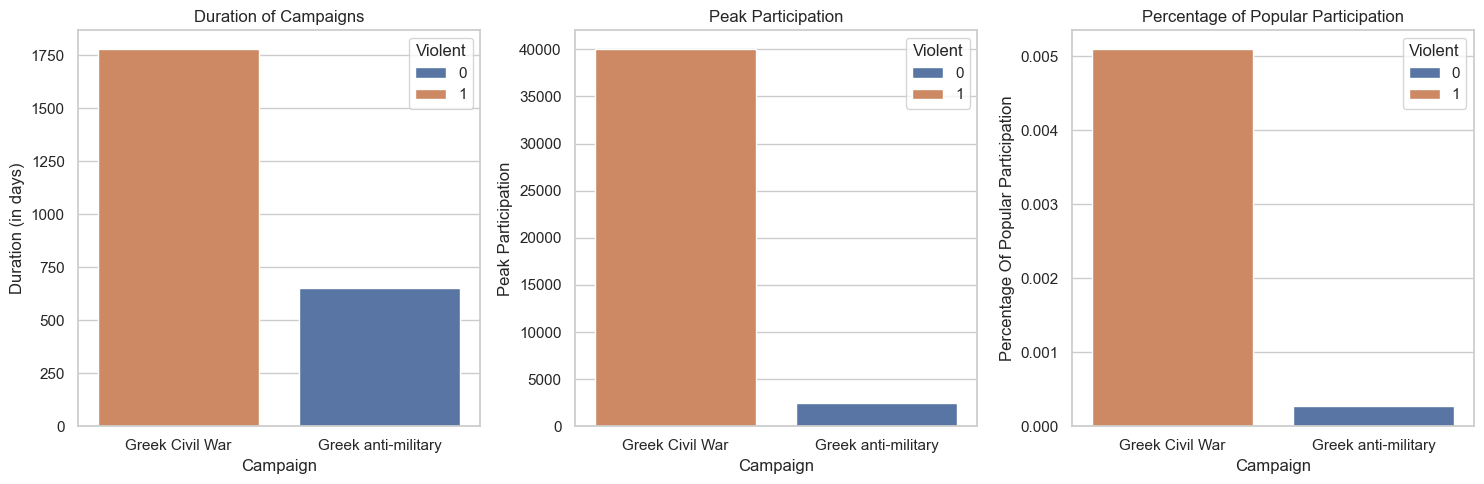

In [52]:
# Creating the subplots.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

bar_plots = []

# Campaign Duration (in days) 
g1 = sns.barplot(x='CAMPAIGN', y='DURATION', hue='VIOL', data=greek_campaigns, ax=axes[0])
bar_plots.append(g1)

axes[0].set_title('Duration of Campaigns')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Duration (in days)')

# Peak Participation
g2 = sns.barplot(x='CAMPAIGN', y='PARTICIPATION', hue='VIOL', data=greek_campaigns, ax=axes[1])
bar_plots.append(g2)

axes[1].set_title('Peak Participation')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Peak Participation')

# Percentage of Popular Participation
g3 = sns.barplot(x='CAMPAIGN', y='PERCENTAGE_POPULAR_PARTICIPATION', hue='VIOL',data=greek_campaigns, ax=axes[2])
bar_plots.append(g3)

axes[2].set_title('Percentage of Popular Participation')
axes[2].set_xlabel('Campaign')
axes[2].set_ylabel('Percentage Of Popular Participation')

new_title = 'Violent'

# Modifying the legend title for each subplot
for g in bar_plots:
    legend = g.get_legend()
    legend.set_title(new_title)

plt.tight_layout()
plt.show()

## 3. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Your plot should look like the following; explain it as best you can.

<img src="fig_4.svg" />

Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):

<img src="fig_5.svg" />

Let's return to our original dataframe.
* Before starting our regression, it's always a good idea to inspect for missing values.
* We can observe that, there are 9 missing values on the `PARTICIPATION` column, and 212 on `VIOLENT FLANK`.

In [27]:
navco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NAVCO ID                          389 non-null    int64  
 1   CAMPAIGN                          389 non-null    object 
 2   LOCATION                          389 non-null    object 
 3   BYEAR                             389 non-null    int64  
 4   EYEAR                             389 non-null    int64  
 5   TARGET                            389 non-null    object 
 6   SUCCESS                           389 non-null    int64  
 7   LIMITED                           389 non-null    int64  
 8   FAILURE                           389 non-null    int64  
 9   ONGOING                           389 non-null    int64  
 10  NONVIOL                           389 non-null    int64  
 11  VIOL                              389 non-null    int64  
 12  REGCHANG

This also can be viewed, simply by adding up all the null values per column.

In [28]:
navco_df.isnull().sum()

NAVCO ID                              0
CAMPAIGN                              0
LOCATION                              0
BYEAR                                 0
EYEAR                                 0
TARGET                                0
SUCCESS                               0
LIMITED                               0
FAILURE                               0
ONGOING                               0
NONVIOL                               0
VIOL                                  0
REGCHANGE                             0
FSELFDET                              0
SECESSION                             0
OTHER                                 0
DURATION                              0
PARTICIPATION                         9
PERCENTAGE_POPULAR_PARTICIPATION      0
REGVIOL                               0
DEFECT                                0
VIOLENT FLANK                       212
VIOLSIM                               1
REGAID                                0
STATESUP                              0


For our regression analysis, we will focus on the `PARTICIPATION` column and ignore `VIOLENT FLANK`. <br>
To handle thus the 9 missing values, we will fill them using `fillna` by the mean value of the existing `PARTICIPATION` data.

In [29]:
navco_df['PARTICIPATION'].fillna(navco_df['PARTICIPATION'].mean(), inplace=True)

navco_df['PARTICIPATION'].isnull().sum()

0

Let's now begin to calculating our independent variables that are going to be used for our Logistic Regression Model.
* If we take a closer look at previous versions of our data, `membership per capita` is defined as the level of participation (logged) in a campaign relative to the population (logged) of a specific location. 
* By inspecting our current data, we see that `PARTICIPATION` is indeed the number of members at peak event.<br> So we start by taking the logarithm of it.

In [30]:
navco_df['LMEMBERSHIP'] = np.log2(navco_df['PARTICIPATION'])

Furthermore, to find the `population` of each campaign can also be done easily since we have already information for the `PERCENTAGE_POPULAR_PARTICIPATION` which is given by:

$$PERC-POPULAR-PARICIPATION = \frac{PARTICIPATION}{POPULATION}$$

* So, we go ahead and calculate that.
* Having calculated the population, when we follow this by taking the logarithm of it, an issue arises.
* Some of our logged population values happen to have infinite values. <br>To address this issue, we decided to replace any infinite values with taking the mean value of the Logged Population.

In [31]:
navco_df['POPULATION'] = navco_df['PARTICIPATION'] / (navco_df['PERCENTAGE_POPULAR_PARTICIPATION'])

navco_df['LNPOP'] = np.log2(navco_df['POPULATION'])

# Replacing any rows containing +-infinite with the mean value of the logged population.
navco_df['LNPOP'].replace([np.inf, -np.inf], np.nan, inplace=True)

navco_df['LNPOP'].fillna(navco_df['LNPOP'].mean(), inplace=True)

Now we can go ahead and calculate then membership per capita.

In [32]:
navco_df['MEMPC'] = navco_df['LMEMBERSHIP'] / navco_df['LNPOP']

Moving forward with our logistic regression model, we utilize the statsmodels library to fit the model using the formula: `SUCCESS ~ MEMPC + LNPOP.`

* Upon fitting the model, we can evaluate it by generating a model summary.
<hr>

* At first glance, we can see that the `Pseudo R-squared` is evaluated at 0.124, meaning our model (independent variables) explains the variance of 12.4% of the data. We have seen that, the evaluation of R-squared is not as significant when comparing it to a R-squared linear regression model and generally a lower `Pseudo R-squared` can indicate a good model. However there is still some room for improvement.

* Moving on to the coefficients generated, we see that both have generally small p-values. <br> This implies that, the model provides some 'evidence' against the null hypothesis (H0) meaning that our coeffiecients are signficant and thus our model is meaningful.

<br>
Looking closer at our coefficients:

* A one-unit increase in `MEMPC` is associated with a 7.3067 increase in the log-odds of success (with all the other variables been constant). <br>
Meaning that even a small increase in `MEMPC` (a higher level of engagement or participation per capita in the campaign), might contribute to a more 'coordinated' and effective campaign, potentially increasing the likelihood of success by a significant amount.
<br><br>
while, suprisignly
<br><br>
* A one-unit increase in `LNPOP` is associated with a -0.1000 decrease in the log-odds of success (with all the other variables been constant). <br>
This suggests that there exists a negative association between the logged population and the log-odds of success. Possible reasons for this negative association between population size and campaign success could be that, generally when dealing with a larger amount of population, makes it more difficult to coordinate efforts, and thus 'hurting' the campaigns overall contribution.

In [33]:
import statsmodels.formula.api as smf


formula = 'SUCCESS ~ MEMPC + LNPOP'

model = smf.logit(formula=formula, data=navco_df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.585261
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  389
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1222
Time:                        21:25:13   Log-Likelihood:                -227.67
converged:                       True   LL-Null:                       -259.36
Covariance Type:            nonrobust   LLR p-value:                 1.716e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5456      1.481     -1.718      0.086      -5.449       0.358
MEMPC          7.3067      1.133      6.452      0.000       5.087       9.526
LNPOP         -0.1000      0.051     -1.965      0.049      -0.200      -0.000
==============================================================================
"""

Having now created the model, we will create a scatterplot that can visually demonstrate this relationship between the logged participants per capita and the probability of success. 
We first get our predictions based on the generated model.

In [34]:
res = model.predict(navco_df[['MEMPC', 'LNPOP']])

And then plot our scatterplot.

* We can certainly observe that as the number of participants increases, there is a tendency for the probability of success to rise. This suggest's that campaigns on average with higher level of participants, tend to have much greater chances of being categorized as `Successful` meaning to achieve their goals or objectives.

* This relatinoship demonstrates a positive and strong correlation, that we can also ensure by checking the Spearman's Correlation Coefficience.

* However, we must note that we cannot be entirely certain about the existence of a definitive relationship between these two variables. <br>While the probability of success appears to increase with the rise in the number of participants, it is not guaranteed that a causal relationship exists between these two variables, as other factors could lead to contribute to these increase.

Spearman's Correlation Coefficient: 0.96826


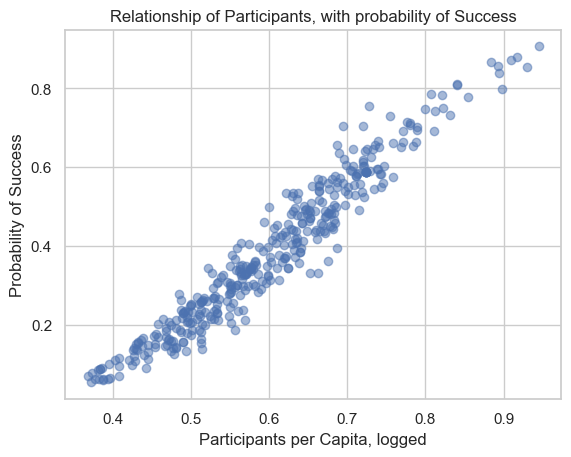

In [35]:
from scipy.stats import spearmanr

# Calculating spearmans correlation coefficience.
rcc, _ = spearmanr(navco_df['MEMPC'], res)

print(f"Spearman's Correlation Coefficient: {rcc:.5f}")

# Plotting scatterplot that shows the relationship between participants
# between participants and prob of success.
plt.scatter((navco_df['MEMPC']), res, alpha=0.5)
plt.title('Relationship of Participants, with probability of Success')
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')
plt.show()

If we now train a logistic regression model, based on the `membership_per_capita` independent variable only, we get the following results.
* We notice, that the p-value for the intercept is decreased, and the membership per capita coefficience is increased.  

In [36]:
import statsmodels.formula.api as smf

formula = 'SUCCESS ~ MEMPC'

model_evolved = smf.logit(formula=formula, data=navco_df).fit()

model_evolved.summary()

Optimization terminated successfully.
         Current function value: 0.590354
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  389
Model:                          Logit   Df Residuals:                      387
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1146
Time:                        21:25:14   Log-Likelihood:                -229.65
converged:                       True   LL-Null:                       -259.36
Covariance Type:            nonrobust   LLR p-value:                 1.268e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1675      0.693     -7.460      0.000      -6.525      -3.810
MEMPC          7.7057      1.107      6.958      0.000       5.535       9.876
==============================================================================
"""

In [37]:
res_evolved = model_evolved.predict(navco_df[['MEMPC']])

We can also observe a notable enhancement in performance using again Spearmans CC, and the corresponding scatterplot, when using only `MEMPC`.

* The "squished" line in the scatterplot aligns with the Spearman correlation coefficient near 1, displaying and giving a strong, monotonically increasing association between `membership per capita` and the likelihood of success.

* Upon this simplified model, when it comes to the independent variables that now is only dependent on `membership per capita`, we see that it provides a clearer insight into the predicting the outcome of campaigns.<br>This gives us a valuable insight that, sometimes, a more 'simple' model (that is a model with only 1 independent variable in our case) can not only provide us with better results, but also a more clear 'picture' between the relationship of `membership per capita` and the probability of success.

Spearman's Correlation Coefficient: 1.00000


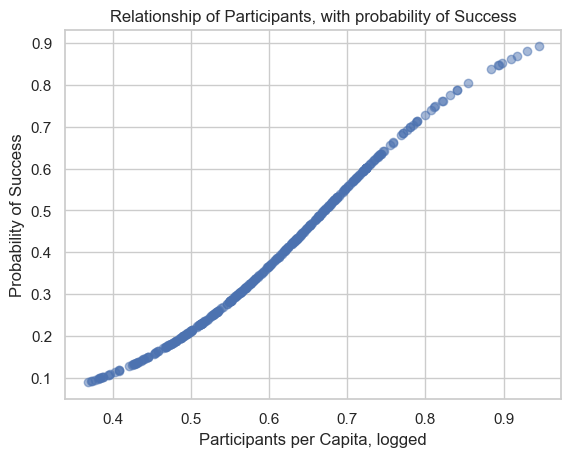

In [38]:
# Calculating spearmans correlation coefficience
rcc, _ = spearmanr(navco_df['MEMPC'], res_evolved)

print(f"Spearman's Correlation Coefficient: {rcc:.5f}")

# Plotting scatterplot that shows the relationship between participants
# between participants and prob of success.
plt.scatter((navco_df['MEMPC']), res_evolved, alpha=0.5)
plt.title('Relationship of Participants, with probability of Success')
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')
plt.show()

## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

<table>
<thead>
<tr><th>Peak Popular Participation (%)  </th><th style="text-align: right;">  Observations</th><th>Success Rate  </th></tr>
</thead>
<tbody>
<tr><td>greater than 3.5%               </td><td style="text-align: right;">            18</td><td>88.89%        </td></tr>
<tr><td>1.0% - 3.5%                     </td><td style="text-align: right;">            41</td><td>60.98%        </td></tr>
<tr><td>0.25% - 1.0%                    </td><td style="text-align: right;">            92</td><td>45.65%        </td></tr>
<tr><td>0.06% - 0.25%                   </td><td style="text-align: right;">            95</td><td>45.26%        </td></tr>
<tr><td>0.015% - 0.06%                  </td><td style="text-align: right;">            66</td><td>24.24%        </td></tr>
<tr><td>0.0035% - 0.015%                </td><td style="text-align: right;">            44</td><td>9.09%         </td></tr>
<tr><td>less than 0.0035%               </td><td style="text-align: right;">            24</td><td>4.17%         </td></tr>
</tbody>
</table>

We'll be using `PrettyTable` to visualize our tables, as it makes it easy to present our tabular data in an clean and appealing way.

In [39]:
!pip install PrettyTable

from prettytable import PrettyTable

In [40]:
table = PrettyTable()
table.field_names = ['Peak Popular Participation (%)', 'Observations', 'Success Rate']

The Chenoweth rule indicates that when 3.5% of a population mobilizes against a government during a peak event, those movements have often succeeded.
<hr>
We can observe this by calculating the following output table. Specifically:

* We calculated for each participation percentage, the number of successful campaigns recorded and the respective number of total campaigns during that range.

* It seems that, when the number of peak participants is increasing, the success rate seems also to be increasing with each lowest value being 5% when having less than 0.0035% peak participation, and it's highest, 88.89% success rate with more than 3.5% peak participation.

* Thus, campaigns recorded in our dataset that had at least 3.5% of participation, semem to have higher likelihood of success compared to failure in this particular percentage. This doesn't however eliminate the possibility of failure for individual campaigns.

In [53]:
threshold_mapping = {
    0.035: 'greater than 3.5%',
    0.01: '1.0% - 3.5%',
    0.0025: '0.25% - 1.0%',
    0.0006: '0.06% - 0.25%',
    0.00015: '0.015% - 0.06%',
    0.000035: '0.0035% - 0.015%',
    None: 'less than 0.0035%'
}

prev_threshold = None

for threshold_from, threshold_str in threshold_mapping.items():
    current_observations = 0
    success_perc = None
    
    # Handling greater than 3.5%
    if threshold_from == 0.035:  
        filtered_df = navco_df[navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] > threshold_from]
    # Handling less than 0.0035%
    elif threshold_from == None:  
        filtered_df = navco_df[(navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] < prev_threshold) 
                               & ~(navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] == 0)]
    else:
        filtered_df = navco_df[
            (navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] > threshold_from)
                            & 
            (navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] <= prev_threshold)
                ]
    current_observations = filtered_df.shape[0]
    
    if current_observations > 0:
        success_obs = filtered_df['SUCCESS'].sum()
        success_perc = round((success_obs / current_observations) * 100, 2)

    table.add_row([threshold_str, current_observations, success_perc])

    prev_threshold = threshold_from

print(table)

+--------------------------------+--------------+--------------+
| Peak Popular Participation (%) | Observations | Success Rate |
+--------------------------------+--------------+--------------+
|       greater than 3.5%        |      18      |    88.89     |
|          1.0% - 3.5%           |      41      |    60.98     |
|          0.25% - 1.0%          |      92      |    45.65     |
|         0.06% - 0.25%          |      95      |    45.26     |
|         0.015% - 0.06%         |      66      |    24.24     |
|        0.0035% - 0.015%        |      44      |     9.09     |
|       less than 0.0035%        |      24      |     4.17     |
|       greater than 3.5%        |      18      |    88.89     |
|          1.0% - 3.5%           |      41      |    60.98     |
|          0.25% - 1.0%          |      92      |    45.65     |
|         0.06% - 0.25%          |      95      |    45.26     |
|         0.015% - 0.06%         |      66      |    24.24     |
|        0.0035% - 0.015%

It's essential to mention however, that a condition such as 'popular percentage' greater than 3.5%, that indicates a high success rate of 89%, could contain a wide range of percentage participation values.<br>Additionally, this group also happen to have a 'sample' of campaigns that fall into this category (18).<br>So this small sample size should be acknowledged when taking conclusions upon this.

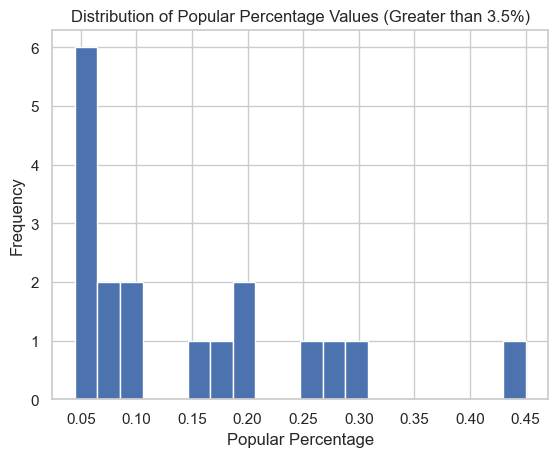

In [42]:
filtered_df = navco_df[navco_df['PERCENTAGE_POPULAR_PARTICIPATION'] >= 0.035]

plt.hist(filtered_df['PERCENTAGE_POPULAR_PARTICIPATION'], bins=20)

plt.title('Distribution of Popular Percentage Values (Greater than 3.5%)')
plt.xlabel('Popular Percentage')
plt.ylabel('Frequency')

plt.show()

In conclusion while the 3.5% gives us a good insight it should be viewed—as also the author mentions—as more of a rule of thumb than an absolute guideness. And that is because it's important to understand that peak participation might or might not be a casual variable. More factors could lead to this consideration of whether a campaign will be considered successful or not

Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

Previously, we found a way to calculate the percentage of success, based on the `membership per capita`.<br> And that is, a measurement of level of the participation in a campaign relative to the population of a specific location logged. 

* If we re-examine our scatterplot that we also plotted earlier, we observe this trend that, when the `membership per capita` (or Participants per Capita) tends to approach values greater than 0.9, the probability of success tends to reach 0.9. <br>
* Furthermore, for larger `membership per capita` values, specifically those greater than or equal to 0.95, the line tends to increase in a slower way and thus follow a more 'linear' trend after reaching 95% participation.
* To address this issue, that is this "uncertainty" that our model comes with, we can turn to the confidence intervals.<br>
This confidence interval will gives us a range of values within which we can expect at a C% percentage that our target value (99% success rate) will "lie" within this range.
* Our model, comes with the maximum and minimum coefficients which refer to the upper and lower bounderies. The upper curve represents the highest possible success rate, while the lower curve represents the lowest possible success rate for that specific x value. (With both being uncertain).
* We can receive these coeff's using the `conf_int()` that is built in method of our model.

In [43]:
# Extracting maximum and minimum coefficients

conf_int = model_evolved.conf_int()

upper_coeffs = conf_int.iloc[:, 1].values
lower_coeffs = conf_int.iloc[:, 0].values

print('Upper Coefficients:', upper_coeffs)
print('Lower Coefficients:', lower_coeffs)

Upper Coefficients: [-3.80995151  9.87618438]
Lower Coefficients: [-6.52512173  5.53514963]


Since we now have the coeffients, we can go ahead and calculate the mathematical model for each, so we can then go ahead and plot it.<br> For this, we will use the more simplified mathematical model.

$$ P(X) = \frac{1}{1 + e^(- (b + a * x))}$$


In [44]:
# Creating an array of 1000 evenly spaced data points
# between the minimum and maximum values of MEMPC.
mempcs = np.linspace(navco_df['MEMPC'].min(), navco_df['MEMPC'].max(), 1000)

# Calculating the upper and lower bound curves based
# on the coeff's and the data points generated.
upper_bound_curve = 1 / (1 + np.exp(- (upper_coeffs[0] + upper_coeffs[1] * mempcs)))
lower_bound_curve = 1 / (1 + np.exp(- (lower_coeffs[0] + lower_coeffs[1] * mempcs)))

We follow this procedure by plotting them in between our actual model.

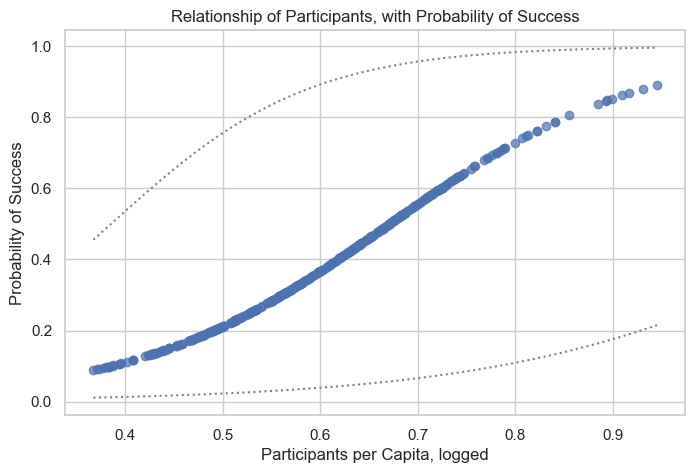

In [45]:
plt.figure(figsize=(8, 5))

# Plotting upper bound curve
plt.plot(mempcs, upper_bound_curve, color='grey', linestyle=':',)

plt.scatter(navco_df['MEMPC'], res_evolved, alpha=0.7)

plt.title('Relationship of Participants, with Probability of Success')
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')

# Plotting our original 
plt.plot(mempcs, lower_bound_curve, color='grey', linestyle=':')

plt.show()

Now, we can easily find the target mempc by filtering the `mempcs` that all our member ship per capita values live.
<br>This can be done by picking up the indice of the first occurance that is found with the biggest lower bound value.

* For this, we leverage again the function `np.where()`, that will return all the indices of `upper_bound_curve` that meet this condition.<br>
(Note here that upper_bound_curve is already sorted in ascending order.)
* Lastly, we use the index found from `indices[0]`
 to map it to the corresponding `MEMPC`.

In [46]:
target_pop_succ = 0.99

# Returns all the indices that meet the condition.
indices = np.where(upper_bound_curve >= target_pop_succ)[0]

# Extracting the first occurance that met the condition
# and getting its corresponding MEMPC value
target_mempc = mempcs[indices[0]]

print('MEMPC for Desired Probability:', target_mempc)

MEMPC for Desired Probability: 0.8513728312013247


The desired percentage population, can be found by finding which of our rows, have a `MEMPC` close to our `mempc_target`.

In [47]:
perc_pop_target = navco_df[(navco_df['MEMPC'] >= target_mempc)].min()

Finally, we can return the estimated percentage population that aligns with 99% success rate.

In [48]:
perc_targ = perc_pop_target['PERCENTAGE_POPULAR_PARTICIPATION']

print('Percentage Population for 99% Success Rate:', percentage_formatter(perc_targ))
      
perc_pop_target[['CAMPAIGN', 'TARGET', 'SUCCESS', 'MEMPC', 'PERCENTAGE_POPULAR_PARTICIPATION']].head()

Percentage Population for 99% Success Rate: 8.5%


CAMPAIGN                            Anti-Islamist Government Protests
TARGET                                                   British rule
SUCCESS                                                             1
MEMPC                                                        0.854833
PERCENTAGE_POPULAR_PARTICIPATION                             0.085106
dtype: object

## 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.

As we mentioned earlier, `polity` column based on dataset manual:<br> '_Provides an indication of where that country falls on a spectrum between democracy and autocracy. A higher positive score suggests a more democratic system, while a lower or negative score suggests a more autocratic system._'<br><br>


The author also mentions that in contrast to `polity2` which is a modified version designed specifically for time-series analyses, `polity` is focused more on providing a general overview of regime characteristics by capturing the overall political regime and thus preferrable for the purposes of our analysis.

In [49]:
polity_subset = polity_df[['country', 'year', 'polity']]

polity_subset.sample(5)

,country,year,polity
175,Afghanistan,1975,-7
1921,Botswana,1987,7
5770,Germany,1893,1
10190,Nepal,1801,-6
5057,Finland,1943,4


We then go ahead and merge our dataframes, on the location and year columns.

In [50]:
# Merging our 2 dataframes, based on their common columns.
merged_df = pd.merge(navco_df, polity_subset, left_on=['LOCATION', 'EYEAR'], \
                                 right_on=['country', 'year'], how='left')
print(merged_df.shape)

merged_df.head()

(389, 32)


,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,VIOLSIM,REGAID,STATESUP,LMEMBERSHIP,POPULATION,LNPOP,MEMPC,country,year,polity
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,1.0,1,1,13.287712,15600000.0,23.895043,0.556087,Afghanistan,1979.0,-66.0
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,1.0,0,1,13.287712,14600000.0,23.799465,0.558320,Afghanistan,1989.0,-8.0
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,1.0,0,0,14.287712,22400000.0,24.416995,0.585154,Afghanistan,1996.0,-7.0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,1.0,1,0,15.872675,36921089.0,25.137942,0.631423,Afghanistan,2014.0,-1.0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,1.0,1,0,18.194603,3294227.0,21.651509,0.840339,Albania,1991.0,-88.0


And similarly, create our logistic regression model, with the extra regime type characteristics, and the category of each campaign.

* Our `Pseudo R-squared` has increased more than our 2 previous models. Although, as we have previously said that generally it doesn't provide a clear view of the 'fitness' of our model, there is room for improvement.
* Also, observe that the `LLR p-value` is also significantly lower (close to 0), which tells us that this additions  provide a significantly better fit to the data.

<hr>
<h5>Polity Effects</h5>

* For a one-unit increase in the polity variable (a more positive Polity V score, indicating a more democratic country), the log-odds of the dependent variable (likely success in your case) decrease by −0.0098.

* Similarly, for a one-unit decrease in the polity variable (a more negative Polity V score, indicating a more autocratic country), the log-odds of the dependent variable increase by 0.0098.<br>
This means that, generally, a more autocratic a country is, the chances of of a campaign being considered successful for that country, (with all the other variables constant) are generally slightly higher.

<h5>NonViolent Status Effects</h5>

* For a one-unit increase in the NONVIOL variable, the log-odds of the dependent variable (likely success in your case) increase by 0.8690.

* Similarly, for a one-unit decrease in the NONVIOL variable, the log-odds of the dependent variable decrease by 0.8690.<br>

* Note here that, NONVIOL is represented as a binary value, meaning 1 when a campaign is being characterized by a Non Violent status, and 0 for a Violent status.
This tells us that, generally, the chances of a campaign to be considered 'Successful' are higher when the campaign follows Non Violent approaches.


In summary, this shows that when also considering regime characteristics and campaign types (`Violent` or `Non Violent`) proves to be important and influential to a campaign's outcome.

In [51]:
formula = 'SUCCESS ~ NONVIOL + polity + LMEMBERSHIP + LNPOP'

reg_model = smf.logit(formula=formula, data=merged_df).fit()

reg_model.summary()

Optimization terminated successfully.
         Current function value: 0.548816
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  312
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1849
Time:                        21:25:28   Log-Likelihood:                -171.23
converged:                       True   LL-Null:                       -210.06
Covariance Type:            nonrobust   LLR p-value:                 5.453e-16
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2431      1.499      0.829      0.407      -1.696       4.182
NONVIOL         0.8690      0.282      3.079      0.002       0.316       1.422
polity         -0.0098      0.004     -2.481      0.013      -0.017      -0.002
LMEMBERSHIP     0.2862      0.059      4.874      0.000       0.171       0.401
LNPOP          -0.2677      0.068     -3.944      0.000      -0.401      -0.135
===============================================================================
"""